# Chapter05 오차역전파법

수치 미분은 단순하고 구현하기도 쉽지만, 계산 시간이 오래 걸린다..

--> 오차역전파법 : 가중치 매개변수의 기울기를 효율적으로 계산!

### 5.1 계산 그래프

- **계산 그래프** : 계산 과정을 그래프로 나타낸 것

 1. 계산 그래프를 구성한다.

 2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다.

- 순전파 : 계산을 왼쪽에서 오른쪽으로 진행하는 단계

- **역전파** : 계산을 오른쪽에서 왼쪽으로 진행, '미분'을 효율적으로 계산할 수 있다.

--- 


연쇄법칙 : 

합성함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.

- **덧셈** 노드의 역전파 : 입력 신호를 다음 노드로 그대로 전달하여 ( 순방향 입력 신호의 값 필요X )

- **곱셈** 노드의 역전파 : '서로 바꾼 값'을 곱해서 전달

### 5.4 단순한 계층 구현하기

In [34]:
# 곱셈 계층
class MulLayer(object):
    def __init__(self):   # 인스턴스 변수인 x, y 초기화
        self.x = None
        self.y = None

    # 순전파를 처리
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out
    
    # 역전파를 처리
    def backward(self, dout):
        dx = dout * self.y      # x와 y를 바꿔 곱한 후 전달
        dy = dout * self.x

        return dx, dy

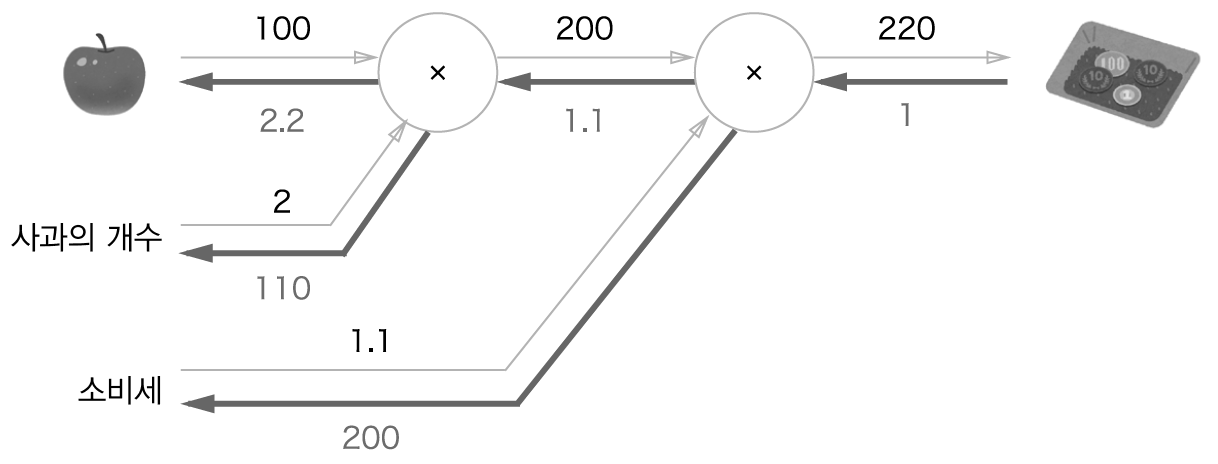

In [35]:
# MulLayer를 사용하여 '사과 쇼핑' 구현

apple = 100     # 사과 가격
apple_num = 2   # 사과 개수
tax = 1.1       # 소비세

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)  # 2 * 100 = 200
price = mul_tax_layer.forward(apple_price, tax)          # 200 * 1.1

print(price)   # 220

220.00000000000003


In [36]:
# 역전파 (각 변수에 대한 미분)
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)          # 1.1  200
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # 2.2  110

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


In [37]:
# 덧셈 계층
class AddLayer(object):
    def __init__(self):   # 초기화가 필요X (입력 신호의 값이 필요하지 않아서 pass)
        pass
    
    def forward(self, x, y):
        out = x + y
        return out

    def backward(slef, dout):   # 그대로 전달
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [40]:
# 곱셈계층과 덧셈계층을 사용한 계산 그래프 구현
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(f'price: {price}')
print(f'dapple_num: {dapple_num}, daaple: {dapple}, dorange: {dorange}, dorange_num: {dorange_num}')
print(f'dtax: {dtax}')

price: 715.0000000000001
dapple_num: 110.00000000000001, daaple: 2.2, dorange: 3.3000000000000003, dorange_num: 165.0
dtax: 650


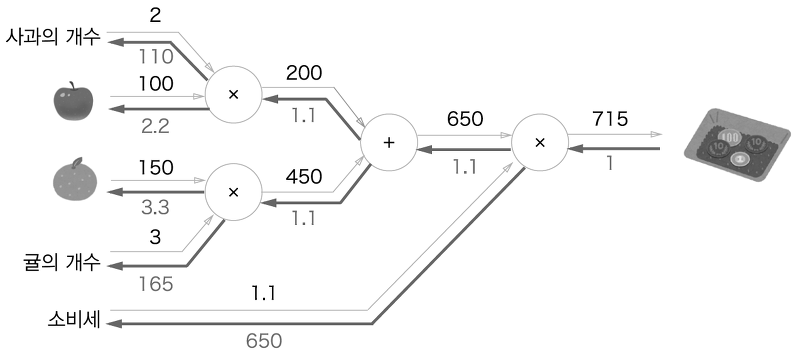

### 5.5 활성화 함수 계층 구현하기